In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pymc as pm
import arviz as az

WARN: Could not locate executable g77
WARN: Could not locate executable f77
WARN: Could not locate executable ifort
WARN: Could not locate executable ifl
WARN: Could not locate executable f90
WARN: Could not locate executable DF
WARN: Could not locate executable efl


# Varying $\beta$ for fixed $\alpha = 0^{\circ}, 45^{\circ}, 90^{\circ}, 135^{\circ}$

In [2]:
# 0.quCNTPlot - 35.quCNTPlot -> alpha=0
# 36.quCNTPlot - 71.quCNTPlot -> alpha=45
# 72.quCNTPlot - 107.quCNTPlot -> alpha=90
# 108.quCNTPlot - 143.quCNTPlot -> alpha=135

beta = np.arange(0, 360, 10)
mean0 = []
std0 = []
for i in range(36):
    a = np.loadtxt("../Data/"+str(i)+".quCNTPlot")
    length = len(a)
    a1 = np.zeros(length)
    for j in range(length):
        a1[j] = a[j][3]/10
    mean0.append(np.mean(a1))
    std0.append(np.std(a1))

# plt.errorbar(beta, mean0, yerr=std0, label=r'$\alpha = 0 \degree$')
# plt.xlabel(r'$\beta$')
# plt.ylabel('Count')
# plt.legend()

mean45 = []
std45 = []
for i in range(36, 72):
    a = np.loadtxt("../Data/"+str(i)+".quCNTPlot")
    length = len(a)
    a1 = np.zeros(length)
    for j in range(length):
        a1[j] = a[j][3]/10
    mean45.append(np.mean(a1))
    std45.append(np.std(a1))

# plt.errorbar(beta, mean45, yerr=std45, label=r'$\alpha = 45 \degree$')
# plt.xlabel(r'$\beta$')
# plt.ylabel('Count')
# plt.legend()

mean90 = []
std90 = []
for i in range(72, 108):
    a = np.loadtxt("../Data/"+str(i)+".quCNTPlot")
    length = len(a)
    a1 = np.zeros(length)
    for j in range(length):
        a1[j] = a[j][3]/10
    mean90.append(np.mean(a1))
    std90.append(np.std(a1))

# plt.errorbar(beta, mean90, yerr=std90, label=r'$\alpha = 90 \degree$')
# plt.xlabel(r'$\beta$')
# plt.ylabel('Count')
# plt.legend()

mean135 = []
std135 = []
for i in range(108, 144):
    a = np.loadtxt("../Data/"+str(i)+".quCNTPlot")
    length = len(a)
    a1 = np.zeros(length)
    for j in range(length):
        a1[j] = a[j][3]/10
    mean135.append(np.mean(a1))
    std135.append(np.std(a1))

# plt.errorbar(beta, mean135, yerr=std135, label=r'$\alpha = 135 \degree$')
# plt.xlabel(r'$\beta$')
# plt.ylabel('Count')
# plt.legend()

# Fitting Formula
$C = \frac{N}{4}p+\frac{N}{4}(1-p)(1+\cos(2\alpha)\cos(2\beta+\beta_0)-\cos(2\theta)(\cos(2\alpha)+\cos(2\beta+\beta_0))+\sin(2\alpha)\sin(2\theta)\sin(2\beta+\beta_0)\cos(\phi))$

In [3]:
alpha = np.empty(144)
alpha[0:36].fill(0)
alpha[36:72].fill(45)
alpha[72:108].fill(90)
alpha[108:144].fill(135)

mean = np.concatenate((mean0, mean45, mean90, mean135), axis=None)
std = np.concatenate((std0, std45, std90, std135), axis=None)

y = alpha*(np.pi/180)
x = np.concatenate((beta, beta, beta, beta), axis=None)*(np.pi/180)

In [4]:
def count(x, y, N, p, beta0, theta, phi):
    return (N/4)*(p + (1-p)*(1+np.cos(2*y)*np.cos(2*x+beta0)-np.cos(2*theta)*(np.cos(2*y)+np.cos(2*x+beta0))+np.sin(2*theta)*np.sin(2*y)*np.sin(2*x+beta0)*np.cos(phi)))

phi = 0.0
with pm.Model() as model:
    N = pm.Uniform('N', 500, 10000, initval=6000)
    p = pm.Uniform('p', 0.001, 0.9, initval=0.1)
    beta0 = pm.Uniform('beta0', -np.pi/2, np.pi/2, initval=0)
    theta = pm.Uniform('theta', -np.pi/2, np.pi/2, initval=0)
    #phi = pm.Uniform('phi', -np.pi/2, np.pi/2, initval=0)
    
    count1 = pm.Deterministic('count1', count(x, y, N, p, beta0, theta, phi))
    pm.Normal('count_likelihood', mu=count1, sigma=std, observed=mean)

In [5]:
with model:
    trace = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [N, p, beta0, theta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 48 seconds.


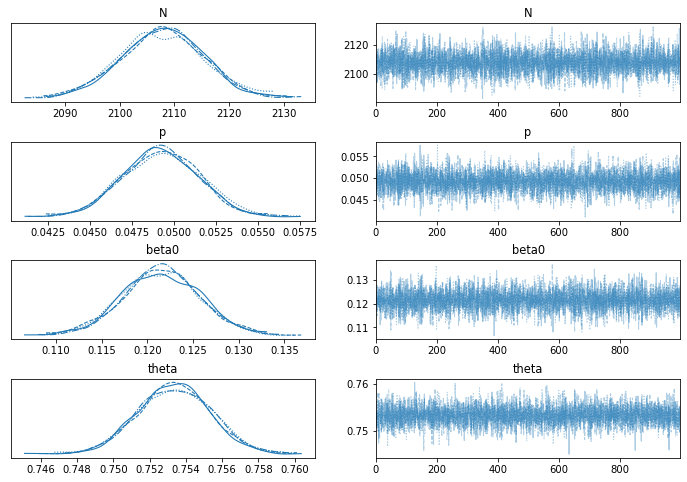

In [6]:
with model:
    axes = az.plot_trace(trace, compact=True, var_names=['N', 'p', 'beta0', 'theta'])
    fig = axes.ravel()[0].figure.subplots_adjust(hspace=0.5)

In [7]:
with model:
    summary = az.summary(trace, var_names=['N', 'p', 'beta0', 'theta'])

In [8]:
display(summary)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
N,2107.782,7.499,2093.344,2121.761,0.09,0.064,6910.0,3063.0,1.0
p,0.049,0.002,0.045,0.053,0.00,0.000,6502.0,2920.0,1.0
beta0,0.121,0.004,0.114,0.130,0.00,0.000,7433.0,3267.0,1.0
theta,0.753,0.002,0.750,0.757,0.00,0.000,6063.0,3194.0,1.0


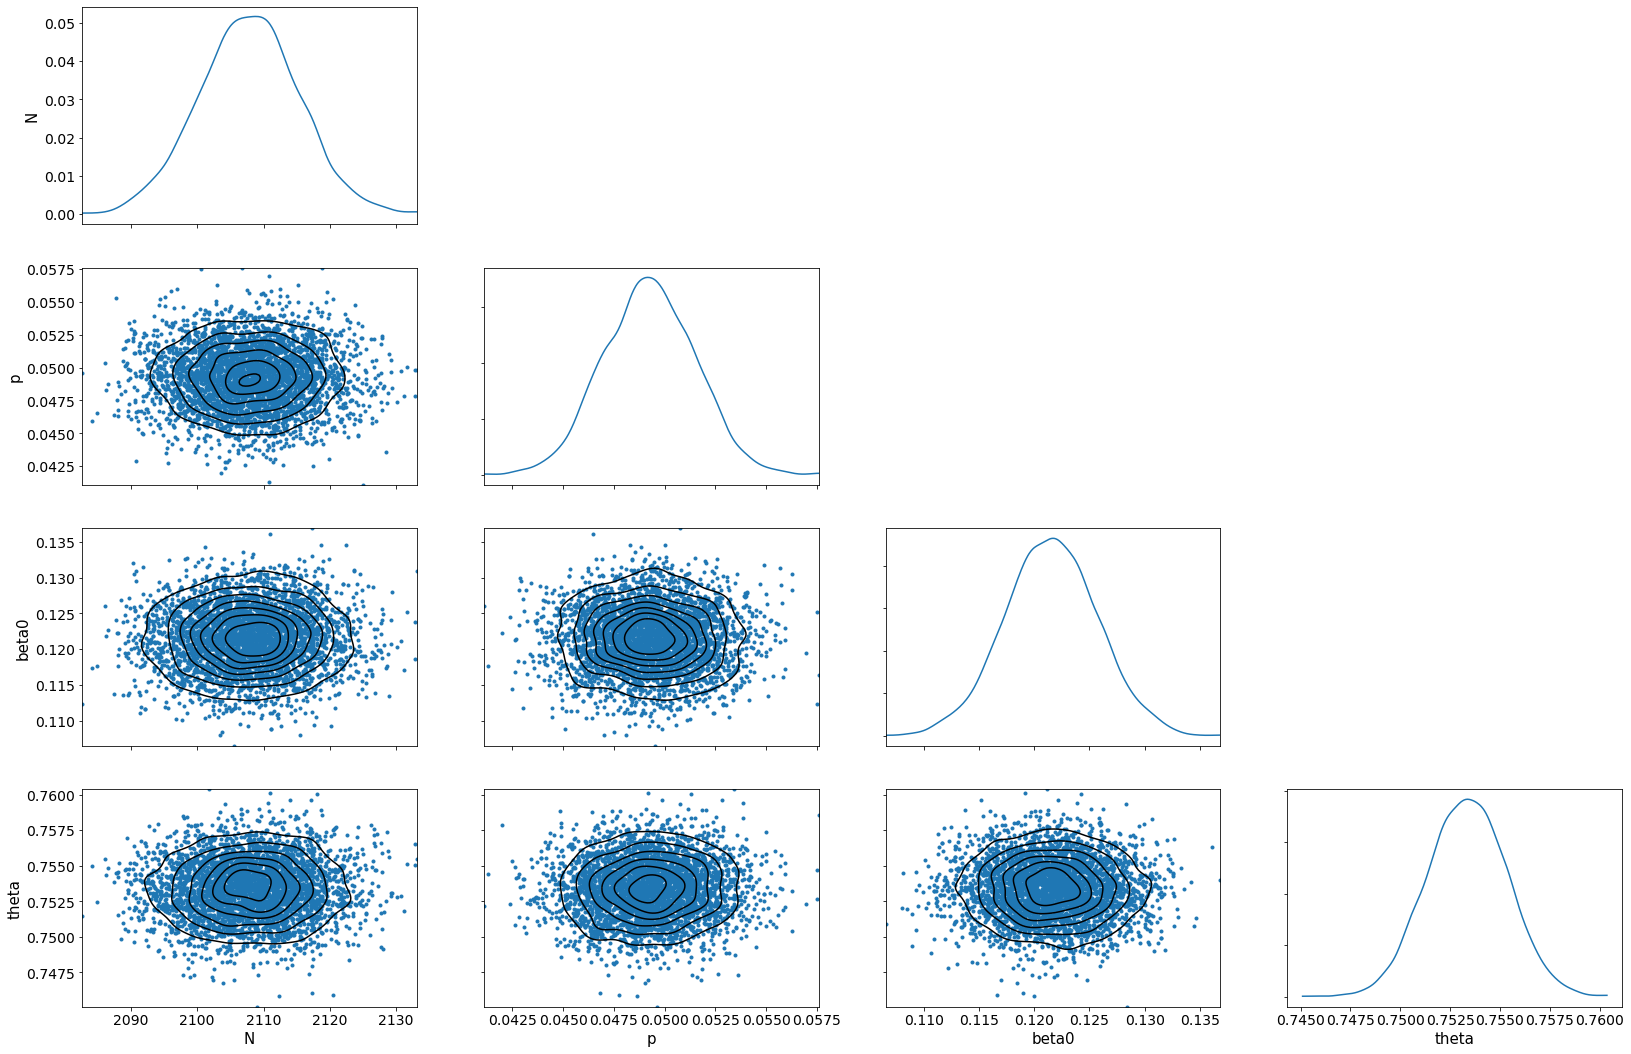

In [9]:
axes = az.plot_pair(trace, var_names=['N', 'p', 'beta0', 'theta'], marginals=True, kind=['scatter', 'kde'], divergences=True)
fig = axes.ravel()[0].figure
fig.savefig('lab.jpg')

$\theta = 0.753 \pm 0.002 = (43.1 \pm 0.1)^{\circ}$

So intial entangled state $|\psi \rangle \approx \frac{1}{\sqrt{2}}(|HH \rangle + |VV \rangle)$

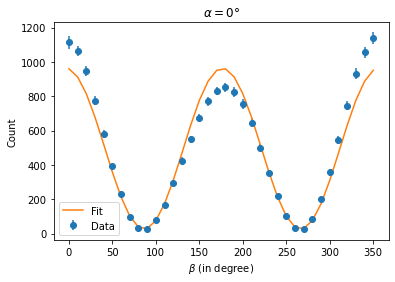

In [10]:
plt.errorbar(beta, mean0, yerr=std0, fmt='o', label='Data')
line = count(beta*(np.pi/180), 0, summary['mean'][0], summary['mean'][1], summary['mean'][2], summary['mean'][3], phi)
plt.plot(beta, line, label='Fit')
plt.xlabel(r'$\beta$ (in degree)')
plt.ylabel('Count')
plt.title(r'$\alpha = 0 \degree$')
plt.legend()
plt.savefig('0.jpg')

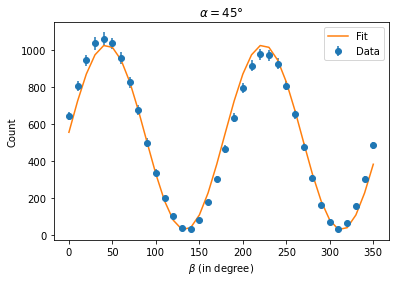

In [11]:
plt.errorbar(beta, mean45, yerr=std45, fmt='o', label='Data')
line = count(beta*(np.pi/180), 45*(np.pi/180), summary['mean'][0], summary['mean'][1], summary['mean'][2], summary['mean'][3], phi)
plt.plot(beta, line, label='Fit')
plt.xlabel(r'$\beta$ (in degree)')
plt.ylabel('Count')
plt.title(r'$\alpha = 45 \degree$')
plt.legend()
plt.savefig('45.jpg')

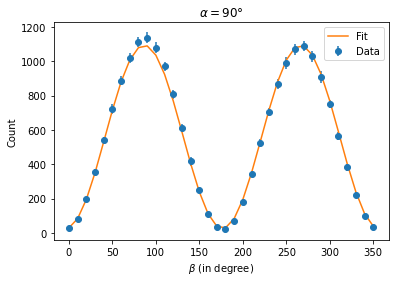

In [12]:
plt.errorbar(beta, mean90, yerr=std90, fmt='o', label='Data')
line = count(beta*(np.pi/180), 90*(np.pi/180), summary['mean'][0], summary['mean'][1], summary['mean'][2], summary['mean'][3], phi)
plt.plot(beta, line, label='Fit')
plt.xlabel(r'$\beta$ (in degree)')
plt.ylabel('Count')
plt.title(r'$\alpha = 90 \degree$')
plt.legend()
plt.savefig('90.jpg')

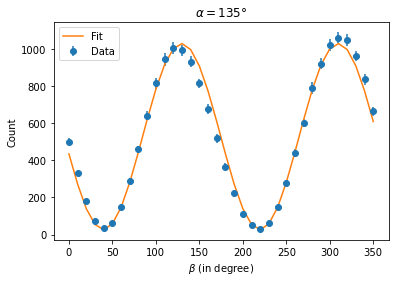

In [13]:
plt.errorbar(beta, mean135, yerr=std135, fmt='o', label='Data')
line = count(beta*(np.pi/180), 135*(np.pi/180), summary['mean'][0], summary['mean'][1], summary['mean'][2], summary['mean'][3], phi)
plt.plot(beta, line, label='Fit')
plt.xlabel(r'$\beta$ (in degree)')
plt.ylabel('Count')
plt.title(r'$\alpha = 135 \degree$')
plt.legend()
plt.savefig('135.jpg')

# Varying both $\alpha$ and $\beta$ with $\alpha = \beta$

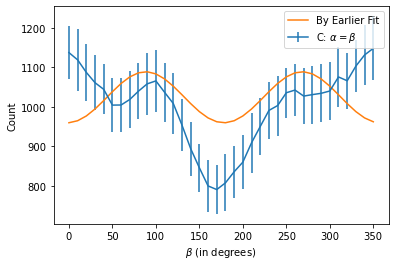

In [38]:
beta = np.arange(0, 360, 10)

meane = []
stde = []
for i in range(36):
    a = np.loadtxt("../Data_alpha=beta/"+str(i)+".quCNTPlot")
    length = len(a)
    a1 = np.zeros(length)
    for j in range(length):
        a1[j] = a[j][3]/10
    meane.append(np.mean(a1))
    stde.append(np.std(a1))
    
plt.errorbar(beta, meane, yerr=stde, label=r'C: $\alpha = \beta$')
plt.plot(beta, count(beta*(np.pi/180), beta*(np.pi/180), summary['mean'][0], summary['mean'][1], summary['mean'][2], summary['mean'][3], phi), label='By Earlier Fit')
plt.xlabel(r'$\beta$ (in degrees)')
plt.ylabel('Count')
plt.legend()
plt.savefig('coincidence_alpha=beta.pdf')

The Fit does not match with coincidence count in $\alpha = \beta$. There is a dip at $180^{\circ}$. 

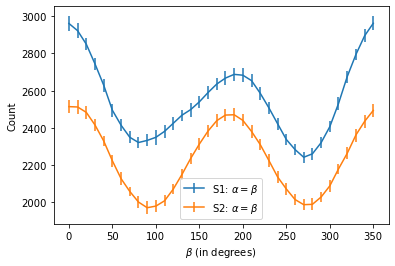

In [34]:
means1 = []
stds1 = []

means2 = []
stds2 = []

for i in range(36):
    a = np.loadtxt("../Data_alpha=beta/"+str(i)+".quCNTPlot")
    length = len(a)
    a1 = np.zeros(length)
    a2 = np.zeros(length)
    for j in range(length):
        a1[j] = a[j][1]/10
        a2[j] = a[j][2]/10
    means1.append(np.mean(a1))
    stds1.append(np.std(a1))
    means2.append(np.mean(a2))
    stds2.append(np.std(a2))
    
plt.errorbar(beta, means1, yerr=stds1, label=r'S1: $\alpha = \beta$')
plt.errorbar(beta, means2, yerr=stds2, label=r'S2: $\alpha = \beta$')
plt.xlabel(r'$\beta$ (in degrees)')
plt.ylabel('Count')
plt.legend()
plt.savefig('single_alpha=beta.pdf')

S1 photon count is not sinusoidal. Probably there is a defect with $\beta$ polarizer.

# Removing $\alpha$

# Fitting Formula:


$C = \frac{N}{4}p+\frac{N}{4}(1-p)(cos^2(\beta+\beta_0/2)sin^2\theta+sin^2(\beta+\beta_0/2)cos^2\theta))$

For $\theta \approx 45^{\circ}$ (case here), $C \approx \frac{N}{2}$ = cosntant, does not have variation with $\beta$.

In [35]:
def count_removed(beta, N, p, beta0, theta):
    return (N/4)*(p+(1-p)*(np.cos(beta+beta0/2)**2*np.sin(theta)**2+np.sin(beta+beta0/2)**2*np.cos(theta)**2))

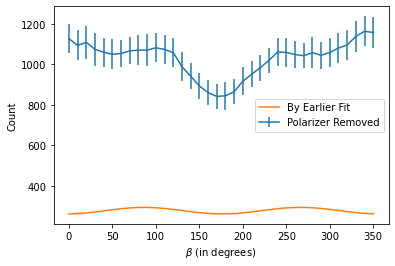

In [39]:
beta = np.arange(0, 360, 10)

meane = []
stde = []
for i in range(36):
    a = np.loadtxt("../Data_polarizer_removed/"+str(i)+".quCNTPlot")
    length = len(a)
    a1 = np.zeros(length)
    for j in range(length):
        a1[j] = a[j][3]/10
    meane.append(np.mean(a1))
    stde.append(np.std(a1))
    
plt.errorbar(beta, meane, yerr=stde, label='Polarizer Removed')
plt.plot(beta, count_removed(beta*(np.pi/180), summary['mean'][0], summary['mean'][1], summary['mean'][2], summary['mean'][3]), label='By Earlier Fit')
plt.xlabel(r'$\beta$ (in degrees)')
plt.ylabel('Count')
plt.legend()
plt.savefig('polarizer_removed.pdf')

Clearly earlier Fit is completely off, w.r.t. only one detector count data.